# Zone Leaders Analysis

This notebook identifies which Bulls player leads in points per game (PPG) for each shot zone on the court.

## Analysis
- Fetch team shot data for the current season
- Calculate PPG per zone for each player
- Identify the leader in each zone (minimum 5 shots required)
- Visualize results on a shot chart with zone boundaries and player headshots

In [1]:
# Setup - Import libraries and configure
import sys
from pathlib import Path

# Add parent directory to path so we can import bulls
sys.path.insert(0, str(Path().absolute().parent))

from bulls import data, analysis, viz
from bulls.config import CURRENT_SEASON
import pandas as pd
import matplotlib.pyplot as plt

# Configure matplotlib for better display in notebooks
plt.style.use('default')
%matplotlib inline

print("✅ Bulls Analytics loaded")
print(f"📅 Season: {CURRENT_SEASON}")
print(f"📊 Ready to analyze zone leaders!")

✅ Bulls Analytics loaded
📅 Season: 2025-26
📊 Ready to analyze zone leaders!


## Step 1: Fetch Team Shot Data

Get all shots from Bulls players for the current season.

In [2]:
# Fetch team shots for the current season
print("Fetching team shot data...")
shots = data.get_team_shots(season=CURRENT_SEASON)

if shots.empty:
    print("⚠️ No shot data available")
else:
    print(f"✅ Loaded {len(shots):,} shots from {shots['game_id'].nunique()} games")
    print(f"\nShot zones available:")
    print(shots['shot_zone'].value_counts())
    print(f"\nPlayers with shots:")
    print(shots['player_name'].value_counts().head(10))

Fetching team shot data...
✅ Loaded 3,815 shots from 42 games

Shot zones available:
shot_zone
Restricted Area          1356
Above the Break 3        1194
In The Paint (Non-RA)     638
Left Corner 3             238
Right Corner 3            215
Mid-Range                 173
Backcourt                   1
Name: count, dtype: int64

Players with shots:
player_name
Nikola Vučević      571
Matas Buzelis       472
Josh Giddey         429
Ayo Dosunmu         376
Kevin Huerter       352
Tre Jones           288
Coby White          276
Jalen Smith         258
Patrick Williams    235
Isaac Okoro         230
Name: count, dtype: int64


## Step 2: Calculate Zone Leaders

Identify which player has the highest PPG in each shot zone (minimum 5 shots required).

In [5]:
# Calculate zone leaders
min_shots = 20  # Minimum shots required to qualify
leaders = analysis.zone_leaders(shots, min_shots=min_shots)

if not leaders:
    print("⚠️ No zone leaders found (may need to lower min_shots threshold)")
else:
    print(f"✅ Found leaders for {len(leaders)} zones:\n")
    for zone, info in leaders.items():
        print(f"{zone}:")
        print(f"  Player: {info['player_name']}")
        print(f"  PPG: {info['ppg']:.2f}")
        print(f"  Total Points: {info['total_points']}")
        print(f"  Total Shots: {info['total_shots']}")
        print(f"  Games: {info['games']}")
        print()

✅ Found leaders for 6 zones:

Above the Break 3:
  Player: Coby White
  PPG: 5.85
  Total Points: 117
  Total Shots: 124
  Games: 20

In The Paint (Non-RA):
  Player: Nikola Vučević
  PPG: 5.07
  Total Points: 208
  Total Shots: 187
  Games: 41

Mid-Range:
  Player: Nikola Vučević
  PPG: 1.74
  Total Points: 54
  Total Shots: 57
  Games: 31

Restricted Area:
  Player: Josh Giddey
  PPG: 6.28
  Total Points: 182
  Total Shots: 155
  Games: 29

Left Corner 3:
  Player: Matas Buzelis
  PPG: 1.76
  Total Points: 51
  Total Shots: 44
  Games: 29

Right Corner 3:
  Player: Ayo Dosunmu
  PPG: 2.45
  Total Points: 54
  Total Shots: 33
  Games: 22



## Step 3: Visualize Zone Leaders

Create a shot chart showing zone boundaries and the leading player (with headshot or name) in each zone.

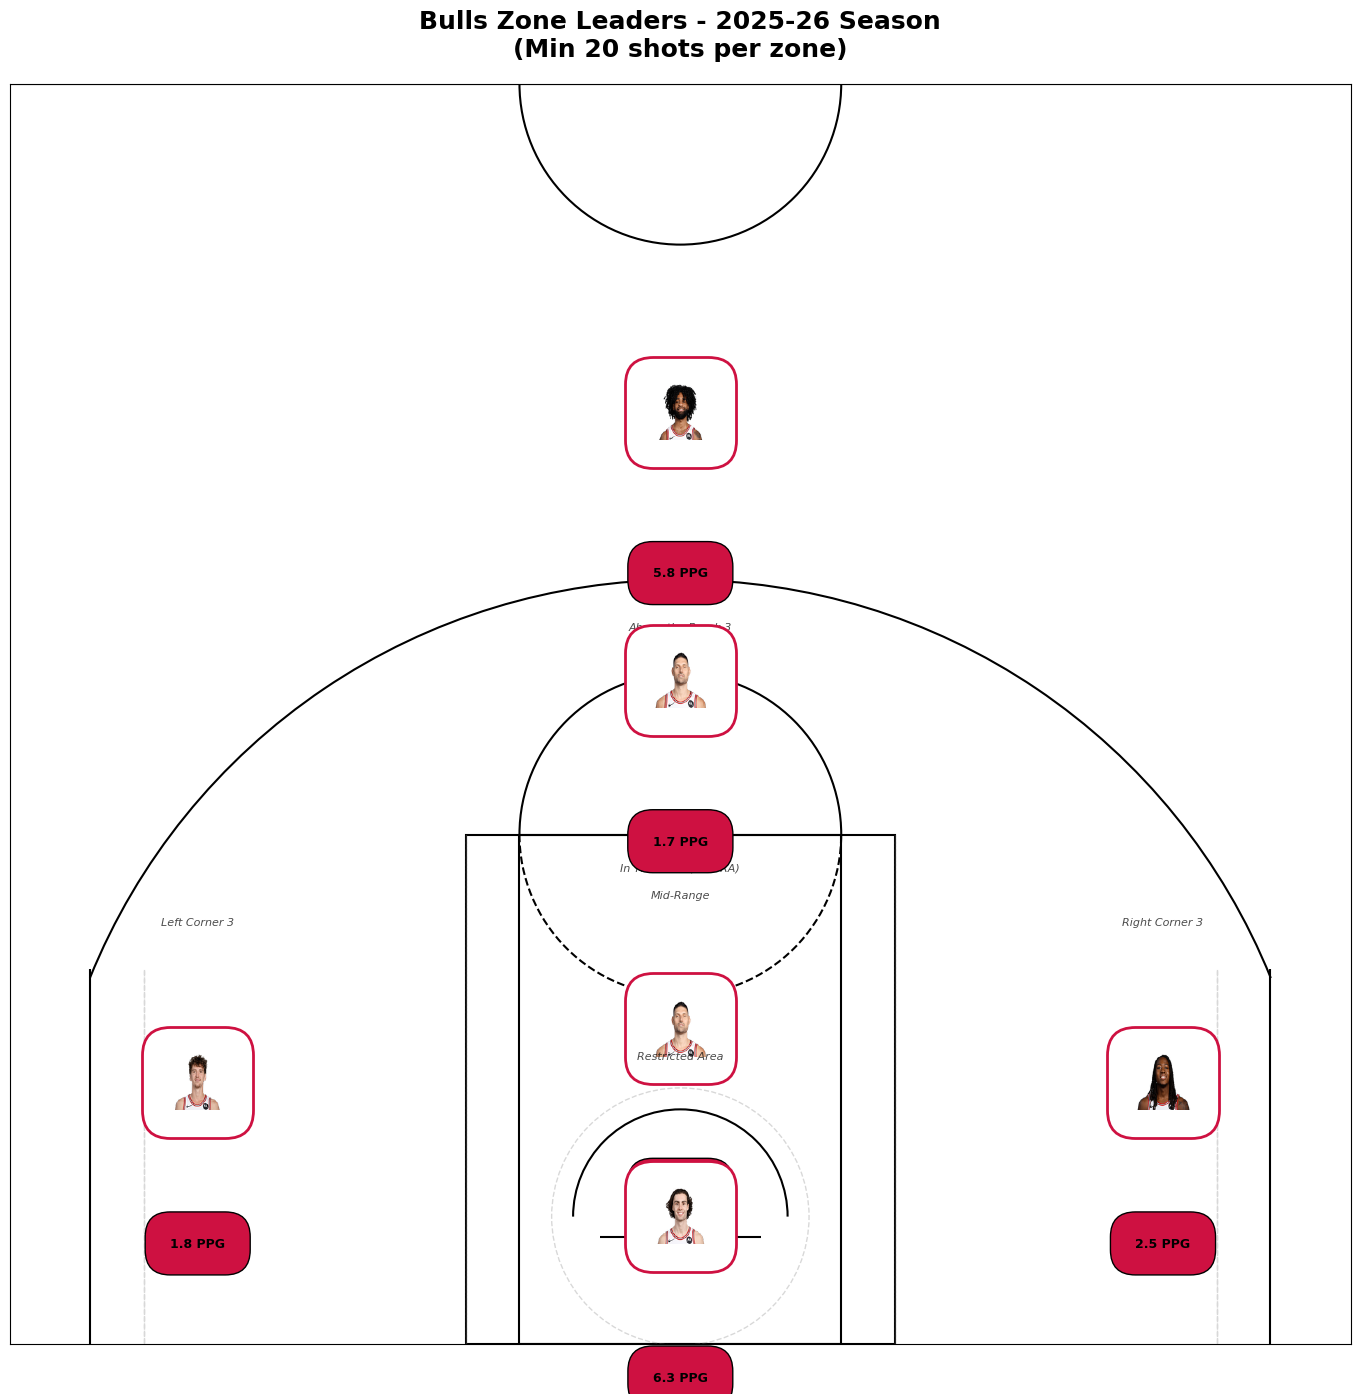

In [6]:
# Create visualization
fig = viz.zone_leaders_chart(
    leaders,
    title=f"Bulls Zone Leaders - {CURRENT_SEASON} Season\n(Min {min_shots} shots per zone)",
    figsize=(16, 14)
)

plt.show()

## Summary

The visualization shows:
- **Zone boundaries** (dashed gray lines) separating different shot areas
- **Player headshots** (or names if unavailable) in each zone
- **PPG values** for the leading player in each zone
- **Zone labels** to identify each area

Players must have at least 5 shots in a zone to qualify as a leader.